#####REUSABLE CODE FOR CLINICALTRIAL_2023

In [0]:
fileroot = "clinicaltrial_2023"
import os
os.environ ['fileroot'] = fileroot

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

Out[2]: True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
%sh
ls /tmp/

Rserv
RtmpkZiDVr
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.csv
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
python_lsp_logs
systemd-private-c9769b09f0794f1eb2ac0bd054087101-apache2.service-JwpEyi
systemd-private-c9769b09f0794f1eb2ac0bd054087101-ntp.service-YB6mdh
systemd-private-c9769b09f0794f1eb2ac0bd054087101-systemd-logind.service-UkgpKi
systemd-private-c9769b09f0794f1eb2ac0bd054087101-systemd-resolved.service-T1vN0f
tmp.PIallZGiKN


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot + ".csv" )

Out[5]: True

In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv" , "/FileStore/tables/" + fileroot + ".csv"  , True)

Out[6]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot + ".csv" )

Out[7]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714475986000)]

#####REUSABLE CODE FOR PHARMA

In [0]:
fileroot = "pharma"
import os
os.environ ['fileroot'] = fileroot

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

Out[9]: True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh
ls /tmp/

Rserv
RtmpkZiDVr
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.csv
pharma.zip
python_lsp_logs
systemd-private-c9769b09f0794f1eb2ac0bd054087101-apache2.service-JwpEyi
systemd-private-c9769b09f0794f1eb2ac0bd054087101-ntp.service-YB6mdh
systemd-private-c9769b09f0794f1eb2ac0bd054087101-systemd-logind.service-UkgpKi
systemd-private-c9769b09f0794f1eb2ac0bd054087101-systemd-resolved.service-T1vN0f
tmp.PIallZGiKN


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot + ".csv" )

Out[12]: True

In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv" , "/FileStore/tables/" + fileroot + ".csv"  , True)

Out[13]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot + ".csv" )

Out[14]: [FileInfo(path='dbfs:/FileStore/tables/pharma.csv/pharma.csv', name='pharma.csv', size=678999, modificationTime=1714475992000)]

#####IMPORT NECESSARY LIBRARIES

In [0]:
# Import necessary libraries
from pyspark import SparkContext
from pyspark.sql import SparkSession


#####INITIALIZE SPARK SESSION

In [0]:
# Create SparkContext
sc = SparkContext.getOrCreate()

In [0]:
# Create SparkSession
spark = SparkSession.builder \
    .appName("Clinical Trials Analysis") \
    .getOrCreate()

#####LOAD AND PREPARE THE DATASETS

In [0]:
# Load clinical trial data as RDD
clinicaltrial_2023_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")
clinicaltrial_2023_rdd1 = clinicaltrial_2023_rdd.map(lambda x: x.split("\t"))
header_row = clinicaltrial_2023_rdd1.first()
# Filter out the header row
clinicaltrial_2023_rdd2 = clinicaltrial_2023_rdd1.filter(lambda row: row != header_row)


In [0]:
clinicaltrial_2023_rdd2.collect()

Out[19]: [['"NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'],
 ['"NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrov

In [0]:
# Define the file location
file_location = "/FileStore/tables/pharma.csv"
# Load the text file into an RDD
pharma_rdd = sc.textFile(file_location)
# Extract header and remove it from the RDD
header = pharma_rdd.first()
pharma_rdd = pharma_rdd.filter(lambda row: row != header)
# Split each line by comma
pharma_rdd = pharma_rdd.map(lambda line: line.split(","))

In [0]:
pharma_rdd.collect()

Out[21]: [['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related offenses"',
  '"False Claims Act and related"',
  '"kickbacks and bribery"',
  '"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid',
  ' biliary and peripheral vascular products."',
  '"federal"',
  '"agency action"',
  '"Justice Department Civil Division"',
  '"civil"',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '"USA"',
  '"Illinois"',
  '"publicly traded"',
  '"ABT"',
  '"pharmaceuticals"',
  '"pharmaceuticals"',
  '"https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians"',
  '""'],
 ['"Abbott Laboratories Inc."',
  '"AbbVie"',
  '"$1',
  '500',
  '000',
  '0

#####PROBLEM STATEMENTS

#####TASK 1 : NUMBER OF STUDIES IN THE DATASET

In [0]:
# Count the number of distinct studies in the dataset
distinct_studies_count = clinicaltrial_2023_rdd.distinct().count()
# Print the result
print("Number of studies in the dataset:", distinct_studies_count)

Number of studies in the dataset: 483423


#####TASK 2 : TYPES OF STUDIES IN THE DATASET ALONG WITH THE FREQUENCIES OF EACH TYPE ORDERED FROM MOST FREQUENT TO LEAST FREQUENT 

In [0]:
# Types of studies with frequencies with empty or null values in 'Type' column
types_rdd = clinicaltrial_2023_rdd2.filter(lambda x: len(x) > 10 ).map(lambda x: (x[10], 1))
# Reduce by key to count occurrences of each type
type_counts_rdd = types_rdd.reduceByKey(lambda x, y: x + y)
# Sort by count in descending order
sorted_type_counts_rdd = type_counts_rdd.sortBy(lambda x: -x[1])
# Collect the result
types_result = sorted_type_counts_rdd.collect()
print("Types of studies with frequencies:")
for item in types_result:
    print(item)


Types of studies with frequencies:
('INTERVENTIONAL', 371382)
('OBSERVATIONAL', 110221)
('EXPANDED_ACCESS', 928)
('', 889)


##### WITHOUT EMPTY VALUES

In [0]:

# Filter out rows without empty or null values in the 'Type' column
types_rdd = clinicaltrial_2023_rdd2.filter(lambda x: len(x) > 10 and x[10] is not None and x[10] != '') \
                                    .map(lambda x: (x[10], 1))
# Reduce by key to count occurrences of each type
type_counts_rdd = types_rdd.reduceByKey(lambda x, y: x + y)
# Sort by count in descending order
sorted_type_counts_rdd = type_counts_rdd.sortBy(lambda x: -x[1])
# Collect the result
types_result = sorted_type_counts_rdd.collect()
# Print the types of studies with frequencies
print("Types of studies with frequencies:")
for item in types_result:
    print(item)


Types of studies with frequencies:
('INTERVENTIONAL', 371382)
('OBSERVATIONAL', 110221)
('EXPANDED_ACCESS', 928)


#####TASK 3 : TOP 5 CONDITIONS WITH THEIR FREQUENCIES

In [0]:
from operator import add
# Top 5 conditions with frequencies
condition_counts = clinicaltrial_2023_rdd2.flatMap(lambda row: [(condition.strip(), 1) for condition in row[4].split("|") if condition.strip() != ""])\
                                          .reduceByKey(add)\
                                          .map(lambda x: (x[1], x[0]))\
                                          .sortByKey(ascending=False)\
                                          .map(lambda x: (x[1], x[0]))\
                                          .collect()

print("\nTop 5 Conditions with Frequencies:")
for condition, count in condition_counts[:5]:
    print(f"{condition}: {count}")


Top 5 Conditions with Frequencies:
Healthy: 9731
Breast Cancer: 7502
Obesity: 6549
Stroke: 4071
Hypertension: 4020


#####TASK 4 : 10 MOST COMMON SPONSORS THAT ARE NOR PHARMACEUTICAL COMPANIES, ALONG WITH NUMBER OF CLINICAL TRIALS THEY HAVE SPONSORED

In [0]:
# 10 most common sponsors that are not pharmaceutical companies
pharma_rdd = spark.read.csv("/FileStore/tables/pharma.csv", header=True)
subquery = pharma_rdd.select("Parent_Company").distinct().rdd.map(lambda x: x[0])
subquery_broadcast = spark.sparkContext.broadcast(set(subquery.collect()))
filtered_rdd = clinicaltrial_2023_rdd2.filter(lambda x: x[6] not in subquery_broadcast.value)
grouped_rdd = filtered_rdd.map(lambda x: (x[6], 1)).reduceByKey(lambda x, y: x + y)
sorted_rdd = grouped_rdd.sortBy(lambda x: x[1], ascending=False)
from pyspark.sql import Row
sorted_data = sorted_rdd.map(lambda x: Row(Sponsor=x[0], Count=x[1]))
sorted_data_rdd = spark.createDataFrame(sorted_data)
sorted_data_rdd.show(10, truncate=False)


+-------------------------------------------------------------+-----+
|Sponsor                                                      |Count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|Novartis Pharmaceuticals                                     |2393 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
+-------------------------------------------------------------+-----+
only showing top 10 

#####TASK 5 : PLOT NUMBER OF COMPLETED STUDIES FOR EACH MONTH IN 2023

In [0]:
# Filter and map to extract month and count 1 for each month
completed_month_counts_rdd = clinicaltrial_2023_rdd2.filter(
    lambda x: len(x) > 13 and x[13] is not None and x[13] != '' and x[3] == 'COMPLETED' and '2023' in x[13]
).map(
    lambda x: (x[13][:7], 1)
)

# Reduce by key to get counts for each month
completed_month_counts_rdd = completed_month_counts_rdd.reduceByKey(lambda a, b: a + b)

# Collect the results
completed_month_counts = completed_month_counts_rdd.collect()

# Print the results
for month, count in completed_month_counts:
    print(month, count)


2023-04 1324
2023-06 1619
2023-09 1152
2023-08 1230
2023-05 1415
2023-10 1058
2023-01 1494
2023-11 909
2023-07 1360
2023-12 1082
2023-02 1272
2023-03 1552


#####VISUALIZATION FOR NUMBER OF COMPLETED STUDIES FOR EACH MONTH IN 2023

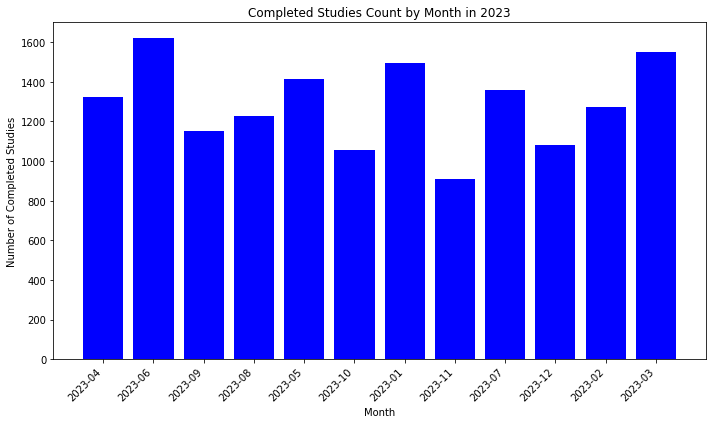

In [0]:
# Visualization
import matplotlib.pyplot as plt

# Extracting months and counts from the collected results
months = [month for month, _ in completed_month_counts]
counts = [count for _, count in completed_month_counts]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Completed Studies Count by Month in 2023')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


#####FUTHER ANALYSIS USING USER DEFINED FUNCTIONS

#####ANALYSIS 1 : COUNT THE OCCURRENCES OF "University if Oregon" IN THE SPONSOR COLUMN

In [0]:
# Define a function to check if "University of Oregon" is in the Sponsor column
def contains_oregon(x):
    return 1 if "University of Oregon" in x else 0

# Apply the function to each element of the RDD and map it to a new RDD
oregon_count_rdd = clinicaltrial_2023_rdd2.map(lambda x: contains_oregon(x[6]))

# Count the occurrences of "University of Oregon" by summing up the values in the new RDD
oregon_studies_count = oregon_count_rdd.reduce(lambda x, y: x + y)

print("Number of studies from University of Oregon:", oregon_studies_count)

Number of studies from University of Oregon: 58


#####REUSABLE CODE FOR CLINICALTRIAL_2020 & CLINICALTRIAL_2021

In [0]:
fileroot1 = "clinicaltrial_2020"
import os
os.environ ['fileroot1'] = fileroot1
fileroot2 = "clinicaltrial_2021"
import os
os.environ ['fileroot2'] = fileroot2

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot1 + ".zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/" + fileroot2 + ".zip", "file:/tmp/")

Out[31]: True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot1.zip
%sh
unzip -d /tmp /tmp/$fileroot2.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
/bin/bash: line 1: fg: no job control
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot1 + ".csv" )
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot2 + ".csv" )

Out[33]: True

In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot1 + ".csv" , "/FileStore/tables/" + fileroot1 + ".csv"  , True)
dbutils.fs.mv("file:/tmp/" + fileroot2 + ".csv" , "/FileStore/tables/" + fileroot2 + ".csv"  , True)

Out[34]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot1 + ".csv" )

Out[35]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714476112000)]

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot2 + ".csv" )

Out[36]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1714476115000)]

#####LOAD AND PREPARE THE DATASETS

In [0]:
# Load clinical trial data as RDD
clinicaltrial_2020_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2020.csv")
clinicaltrial_2020_rdd1 = clinicaltrial_2020_rdd.map(lambda x: x.split("\t"))
# Filter out the header row
header_row = clinicaltrial_2020_rdd1.first()
clinicaltrial_2020_rdd2 = clinicaltrial_2020_rdd1.filter(lambda row: row != header_row)
clinicaltrial_2020_rdd2 .collect()

Out[37]: [['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||'],
 ['NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|'],
 ['NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|'],
 ['NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|'],
 ['NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|'],
 ['NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate'],
 ['NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|'],


In [0]:
# Load clinical trial data as RDD
clinicaltrial_2021_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")
clinicaltrial_2021_rdd1 = clinicaltrial_2021_rdd.map(lambda x: x.split("\t"))
# Filter out the header row
header_row = clinicaltrial_2021_rdd1.first()
clinicaltrial_2021_rdd2 = clinicaltrial_2021_rdd1.filter(lambda row: row != header_row)
clinicaltrial_2021_rdd2 .collect()

Out[38]: [['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||'],
 ['NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|'],
 ['NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|'],
 ['NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|'],
 ['NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|'],
 ['NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate'],
 ['NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|'],
